In [2]:
from astropy.io import fits 
import pandas as pd 
import numpy as np
import umap
import matplotlib.pyplot as plt 
import smplotlib
import torch
from spender.data.sdss import SDSS, BOSS
import os 

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
github = "pmelchior/spender"
sdss, model = torch.hub.load(github, 'sdss_II', map_location=torch.device('cpu'))

data_path = "/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/spectra"

df = pd.read_csv('/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/QSO_DR16_catalogue.csv', dtype = object)

#plates, mjds, fiberids = df['plate'], df['mjd'], df['fiberid']
plates = []
mjds = []
fiberids = []

#ids = ((412, 52254, 308), (412, 52250, 129))

dir = '/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/spectra'
for sub_dir in os.listdir(dir): 
    sub_dir = os.path.join(dir, sub_dir)
    for file in os.listdir(sub_dir): 
        if '.1' not in file: 
            file_list = file.split('-')
            plates.append(int(file_list[1]))
            mjds.append(int(file_list[2]))
            fiberids.append(int(file_list[3].split('.')[0]))

ids = list((plates[i], mjds[i], fiberids[i]) for i in range(0,2000))
print((len(fiberids)))
spec, w, z, norm, zerr = BOSS.make_batch(data_path, ids)

# only encode into latents
with torch.no_grad():
    s = model.encode(spec)

Using cache found in /Users/yaroslav/.cache/torch/hub/pmelchior_spender_main


5023


In [6]:
#latents = s.numpy() 
latent_space = s.numpy()
latent_space = latent_space[~np.isnan(latent_space).any(axis=1)]

for i in latent_space: 
    print(i)

[ 0.4815742   0.11025886 -0.13731535 -0.6348152  -0.27510056  0.18237746]
[ 1.1524128   0.12771127 -1.0589172  -1.6942788  -1.1308339   1.1566179 ]
[ 0.775108    0.2139248  -0.43375003 -1.1423905  -0.60662335  0.522282  ]
[ 0.69755185  0.3191505  -0.10898109 -1.168087   -0.28922716  0.44344977]
[ 1.0594369   0.26971638 -0.8643007  -1.6980925  -0.8315943   0.9525826 ]
[ 0.81647646  0.04926518 -0.70394915 -0.9720277  -0.6672557   0.6439728 ]
[ 0.7886425   0.27226263 -0.47036463 -1.2099489  -0.69125926  0.5485033 ]
[ 1.2408675   0.34102878 -1.1735613  -2.1827705  -1.1081672   1.3970201 ]
[ 0.87254876  0.02247195 -0.7178891  -1.1269861  -0.81175816  0.7790731 ]
[ 0.49435806  0.215022   -0.05390929 -0.709348   -0.31099913  0.21434379]
[ 1.0072935   0.1642412  -0.86142737 -1.588641   -0.8672268   0.96708876]
[ 1.0526338   0.57875764 -0.8835579  -2.1405582  -0.8087117   1.2109905 ]
[ 1.1196389   0.5655225  -0.7144105  -2.132458   -0.95455104  0.984314  ]
[ 0.79850143  0.22416294 -0.5154079  -

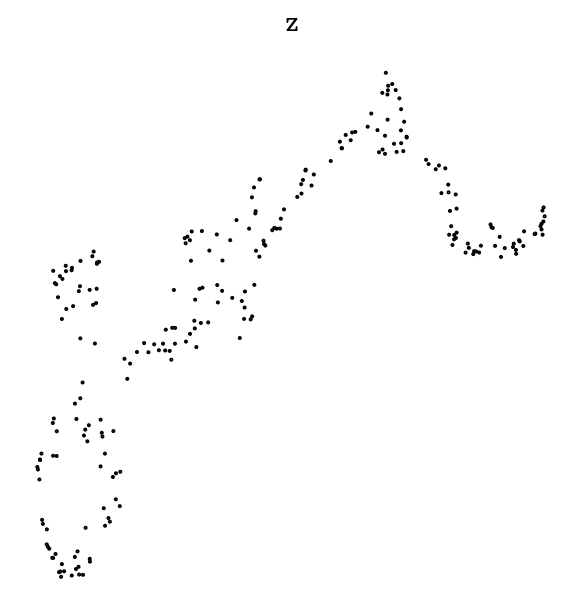

In [14]:
reducer = umap.UMAP(n_components=2)
reduced_data = reducer.fit_transform(latent_space)

# Plot the Reduced Data 

umap_x = reduced_data[:, 0]
umap_y = reduced_data[:, 1]

z_values = z.numpy()
z_values = z_values[0:2000]
z_values = z_values[~np.isnan(s.numpy()).any(axis=1)]


fig, ax = plt.subplots()

cmap = ax.scatter(umap_x, umap_y, s=2, c=z_values)
ax.set(title='z')
ax.set_axis_off()

#fig.colorbar(cmap, orientation="horizontal", pad=0.1)

plt.show()

In [9]:
type(z)

torch.Tensor